In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
df.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28389,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39033,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29450,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14625,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36745,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29158,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27623,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
import matplotlib.pyplot as plt

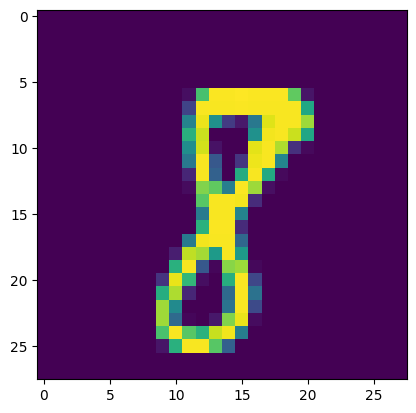

In [6]:
plt.imshow(df.iloc[18307, 1:].values.reshape(28,28))

In [7]:
x = df.iloc[:, 1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [9]:
x_train.shape

(33600, 784)

In [10]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
import time 
start = time.time()
y_predict=knn.predict(x_test) # this step will take a lot of time. So we are writing PCA
print (time.time()-start)

13.024844646453857


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9648809523809524

## NOW USING PCA

In [16]:
from sklearn.preprocessing import StandardScaler 
si= StandardScaler()

In [17]:
x_train = si.fit_transform(x_train)
x_test = si.transform(x_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [19]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [20]:
x_train_trf.shape

(33600, 200)


******Principal components are the transformed features (or axes) derived from the original dataset in Principal Component Analysis (PCA). These components represent the directions in which the data varies the most, capturing the maximum variance in a reduced-dimensional space.The number of components refers to how many of these transformed axes are retained for analysis, balancing dimensionality reduction and information retention.******


In [21]:
knn.fit(x_train_trf, y_train)
y_pred = knn.predict(x_test_trf)
accuracy_score(y_test, y_pred)

0.9508333333333333

**EARLIER WE GOT A ACCURACY SCORE OF 96% WHEN WE HAD 784 FEATURES AND AFTER APPLYING PCA WE HAVE REDUCED THE NUMBER OF FEATURES STILL WE ARE GETTING AROUND 95% ACCURACY.**

In [26]:
for i in range (1, 200):
    pca = PCA (n_components = i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf, y_train)
    y_predi = knn.predict(x_test_trf)
    print(accuracy_score(y_test, y_predi))

0.25761904761904764
0.32392857142857145
0.5104761904761905
0.665952380952381
0.7377380952380952
0.8221428571428572
0.843452380952381
0.871904761904762
0.8864285714285715
0.9054761904761904
0.911547619047619
0.9178571428571428
0.9289285714285714
0.9342857142857143
0.9376190476190476
0.9375
0.9403571428571429
0.940952380952381
0.9432142857142857
0.9435714285714286
0.9430952380952381
0.9439285714285715
0.9444047619047619
0.945595238095238
0.9488095238095238
0.9484523809523809
0.9472619047619047
0.9479761904761905
0.9498809523809524
0.9498809523809524
0.9514285714285714
0.9510714285714286
0.9511904761904761
0.9511904761904761
0.9515476190476191
0.9516666666666667
0.9529761904761904
0.9519047619047619
0.9535714285714286
0.9530952380952381
0.9528571428571428
0.9525
0.9535714285714286
0.9533333333333334
0.9532142857142857
0.954047619047619
0.9533333333333334
0.9529761904761904
0.9536904761904762
0.954047619047619
0.9535714285714286
0.9538095238095238
0.954047619047619
0.9552380952380952
0.954

**LET'S VISUALIZE THE DATA IN 2 D**

In [27]:
pca = PCA (n_components = 2)
x_train_1 = pca.fit_transform(x_train)
x_test_1 = pca.transform(x_test)

In [28]:
import plotly.express as px 

In [31]:
y_train_1 = y_train.astype(str)
fig = px.scatter(x=x_train_1[:,0], y = x_train_1[:, 1],
                 color = y_train_1, color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

## TRANSFORMING IN 3D 

In [32]:
pca = PCA (n_components = 3)
x_train_2 = pca.fit_transform(x_train)
x_test_2 = pca.transform(x_test)

In [35]:
y_train_2 = y_train.astype(str)
fig = px.scatter_3d(df,x=x_train_2[:,0], y = x_train_2[:, 1], z=x_train_2[:,2],
                 color = y_train_2)
fig.update_layout(margin = dict(l=20, r=20, t=20, b=20))
fig.show()

In [36]:
pca.explained_variance_
# Eigen Values

array([40.67111197, 29.17023394, 26.74459593])

In [38]:
pca.components_, pca.components_.shape
# eigen vectors

(array([[ 1.11862265e-17, -6.53807299e-19, -9.70116653e-20, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [ 1.01200782e-16,  2.70193474e-18,  3.65923779e-18, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [ 9.71296296e-17,  3.38139062e-17,  2.12187833e-17, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 (3, 784))

In [40]:
pca.explained_variance_ratio_*100
# how much percentage of variance are the eigen values explaing

array([5.78519225, 4.14926967, 3.80423897])

In [41]:
pca = PCA (n_components = None)
x_train_3 = pca.fit_transform(x_train)
x_test_3 = pca.transform(x_test)

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

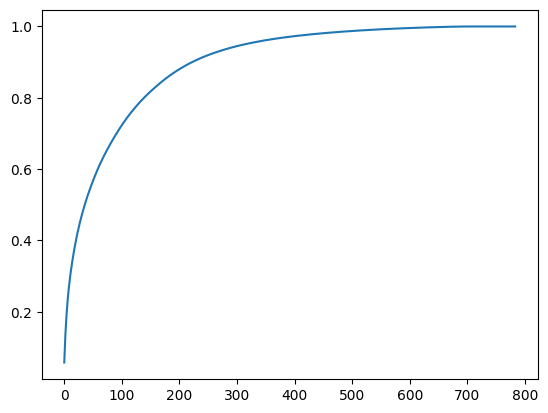

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [50]:
# we can we around 200 components are explaining around 90% data. 